<a href="https://colab.research.google.com/github/JulioCSR/Aprendendo/blob/master/projeto_integrador_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise dos dados do BC

fonte:
https://dadosabertos.bcb.gov.br/dataset/scr_data

###Importado dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style()
%matplotlib inline

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Projeto integrador IV/planilha_202212.csv", sep= ";" , thousands = '.', decimal = ',')
dados.head()

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,...,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,2022-12-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,...,722.65,12689.82,0.00,0.00,0.00,0.00,2813.38,16225.85,0.00,0.00
1,2022-12-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,...,4990017.63,1242329.92,152609.36,31858.72,0.00,0.00,328556.06,6745371.69,123984.25,243547.54
2,2022-12-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,...,1835015.57,4824698.55,12174468.74,10039746.09,11094339.68,0.00,76894.25,40045162.88,567775.56,653774.53
3,2022-12-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,...,233181.56,604262.08,968540.05,577758.58,279960.02,0.00,3460.94,2667163.23,0.00,0.00
4,2022-12-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,...,108700.78,303018.08,674831.27,447813.30,934450.37,200864.96,0.00,2669678.76,0.00,0.00


In [ ]:
dados.shape

(884863, 23)

In [ ]:
dados.columns

Index(['data_base', 'uf', 'tcb', 'sr', 'cliente', 'ocupacao', 'cnae_secao',
       'cnae_subclasse', 'porte', 'modalidade', 'origem', 'indexador',
       'numero_de_operacoes', 'a_vencer_ate_90_dias',
       'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias',
       'a_vencer_de_1081_ate_1800_dias', 'a_vencer_de_1801_ate_5400_dias',
       'a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico'],
      dtype='object')

In [ ]:
colunas_numericas = ['a_vencer_ate_90_dias',
       'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias',
       'a_vencer_de_1081_ate_1800_dias', 'a_vencer_de_1801_ate_5400_dias',
       'a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico']
dados_corr = dados[colunas_numericas]

In [ ]:
dados_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884863 entries, 0 to 884862
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   a_vencer_ate_90_dias            884863 non-null  float64
 1   a_vencer_de_91_ate_360_dias     884863 non-null  float64
 2   a_vencer_de_361_ate_1080_dias   884863 non-null  float64
 3   a_vencer_de_1081_ate_1800_dias  884863 non-null  float64
 4   a_vencer_de_1801_ate_5400_dias  884863 non-null  float64
 5   a_vencer_acima_de_5400_dias     884863 non-null  float64
 6   vencido_acima_de_15_dias        884863 non-null  float64
 7   carteira_ativa                  884863 non-null  float64
 8   carteira_inadimplida_arrastada  884863 non-null  float64
 9   ativo_problematico              884863 non-null  float64
dtypes: float64(10)
memory usage: 67.5 MB


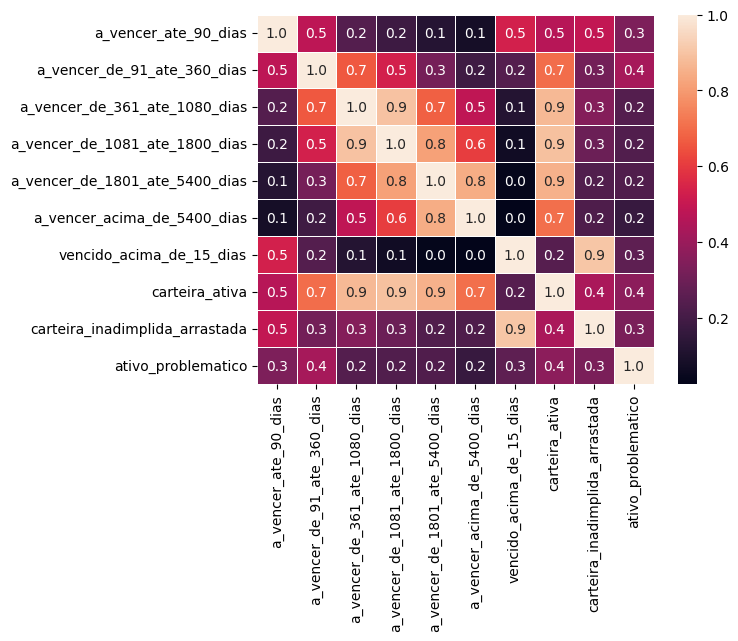

In [ ]:
correlacao = dados_corr.corr()
#plotar correlação
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot;

In [ ]:
colunas= ['data_base', 'uf', 'tcb','cliente', 'ocupacao','porte', 'modalidade', 'origem','vencido_acima_de_15_dias','ativo_problematico']
df = dados[colunas]
df.head()

,data_base,uf,tcb,cliente,ocupacao,porte,modalidade,origem,vencido_acima_de_15_dias,ativo_problematico
0,2022-12-31,AC,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,2813.38,0.00
1,2022-12-31,AC,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,328556.06,243547.54
2,2022-12-31,AC,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,Sem destinação específica,76894.25,653774.53
3,2022-12-31,AC,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,Sem destinação específica,3460.94,0.00
4,2022-12-31,AC,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,0.00,0.00


In [ ]:
df['ocupacao'].unique()

array(['PF - Aposentado/pensionista', 'PF - Autônomo',
       'PF - Empregado de empresa privada',
       'PF - Empregado de entidades sem fins lucrativos',
       'PF - Empresário', 'PF - MEI', 'PF - Outros',
       'PF - Servidor ou empregado público', '-'], dtype=object)

###Verificação dos dados

In [ ]:
#verificar se tem dados faltantes
df.isna().any()

data_base                   False
uf                          False
tcb                         False
cliente                     False
ocupacao                    False
porte                       False
modalidade                  False
origem                      False
vencido_acima_de_15_dias    False
ativo_problematico          False
dtype: bool

In [ ]:
#verificando tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884863 entries, 0 to 884862
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   data_base                 884863 non-null  object 
 1   uf                        884863 non-null  object 
 2   tcb                       884863 non-null  object 
 3   cliente                   884863 non-null  object 
 4   ocupacao                  884863 non-null  object 
 5   porte                     884863 non-null  object 
 6   modalidade                884863 non-null  object 
 7   origem                    884863 non-null  object 
 8   vencido_acima_de_15_dias  884863 non-null  float64
 9   ativo_problematico        884863 non-null  float64
dtypes: float64(2), object(8)
memory usage: 67.5+ MB


In [ ]:
!pip install plotly==5.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_ativo_com_problema = df.groupby('uf')['ativo_problematico'].count()

In [ ]:
df_media_ativo_com_problema = df.groupby('uf')['ativo_problematico'].mean()

In [ ]:
df_media_vencido_acima_de_15_dias = df.groupby('uf')['vencido_acima_de_15_dias'].mean()

In [ ]:
dados_para_grafico = pd.DataFrame({'Medias_vencido_acima_de_15_dias': df_media_vencido_acima_de_15_dias,'Medias_ativo_com_problema': df_media_ativo_com_problema,'Qtde_de_Ativo_com_problema':df_ativo_com_problema})

In [ ]:
dados_para_grafico.head()

,Medias_vencido_acima_de_15_dias,Medias_ativo_com_problema,Qtde_de_Ativo_com_problema
uf,,,
AC,31892.127367,85790.674736,8512
AL,92667.404917,215433.308034,14435
AM,86032.740113,231287.333731,18257
AP,48319.342331,123462.727575,7856
BA,170985.104778,420879.359084,36599


In [ ]:
dados_para_grafico.reset_index(inplace=True)

In [ ]:
dados_para_grafico.head()

,uf,Medias_vencido_acima_de_15_dias,Medias_ativo_com_problema,Qtde_de_Ativo_com_problema
0,AC,31892.127367,85790.674736,8512
1,AL,92667.404917,215433.308034,14435
2,AM,86032.740113,231287.333731,18257
3,AP,48319.342331,123462.727575,7856
4,BA,170985.104778,420879.359084,36599


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(dados_para_grafico, x="Medias_ativo_com_problema", y="Medias_vencido_acima_de_15_dias",
	         size="Qtde_de_Ativo_com_problema", color="uf",
                 hover_name="uf", log_x=True, size_max=60)
fig.show()

###Modificando o data frame

In [ ]:
#cria variável 0 e 1
# 1 para valores maiores que 0 e 0 para valores igual a 0
inadimplente = [i if i == 0 else 1 for i in df['ativo_problematico']]


In [ ]:
df['inadimplente'] = inadimplente
df.head(3)

<ipython-input-23-0508bd107533>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,data_base,uf,tcb,cliente,ocupacao,porte,modalidade,origem,vencido_acima_de_15_dias,ativo_problematico,inadimplente
0,2022-12-31,AC,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,2813.38,0.00,0.0
1,2022-12-31,AC,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,328556.06,243547.54,1.0
2,2022-12-31,AC,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,Sem destinação específica,76894.25,653774.53,1.0


In [ ]:
df['inadimplente'] = df['inadimplente'].astype(int)

<ipython-input-24-402b8c74db1d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
colunas= ['tcb','cliente', 'ocupacao','porte', 'modalidade', 'origem','vencido_acima_de_15_dias','ativo_problematico','inadimplente']

In [ ]:
df_modificado = df[colunas].query('cliente == "PF"')
df_modificado.head(3)

,tcb,cliente,ocupacao,porte,modalidade,origem,vencido_acima_de_15_dias,ativo_problematico,inadimplente
0,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,2813.38,0.00,0
1,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,328556.06,243547.54,1
2,Bancário,PF,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,Sem destinação específica,76894.25,653774.53,1


In [ ]:
df_modificado = pd.get_dummies(df_modificado)
display(df_modificado)

,vencido_acima_de_15_dias,ativo_problematico,inadimplente,tcb_Bancário,tcb_Cooperativas,tcb_Não bancário,cliente_PF,ocupacao_PF - Aposentado/pensionista,ocupacao_PF - Autônomo,ocupacao_PF - Empregado de empresa privada,...,porte_PF - Sem rendimento,modalidade_PF - Cartão de crédito,modalidade_PF - Empréstimo com consignação em folha,modalidade_PF - Empréstimo sem consignação em folha,modalidade_PF - Habitacional,modalidade_PF - Outros créditos,modalidade_PF - Rural e agroindustrial,modalidade_PF - Veículos,origem_Com destinação específica,origem_Sem destinação específica
0,2813.38,0.00,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,328556.06,243547.54,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,76894.25,653774.53,1,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3460.94,0.00,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.00,0.00,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884601,2463.92,6457.38,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
884602,0.00,0.00,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
884603,11690.57,92500.39,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
884604,9839.34,4842.19,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_modificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135922 entries, 0 to 884605
Data columns (total 33 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   vencido_acima_de_15_dias                                  135922 non-null  float64
 1   ativo_problematico                                        135922 non-null  float64
 2   inadimplente                                              135922 non-null  int64  
 3   tcb_Bancário                                              135922 non-null  uint8  
 4   tcb_Cooperativas                                          135922 non-null  uint8  
 5   tcb_Não bancário                                          135922 non-null  uint8  
 6   cliente_PF                                                135922 non-null  uint8  
 7   ocupacao_PF - Aposentado/pensionista                      135922 non-null  uint8  
 8   ocup

###Balanciando dados

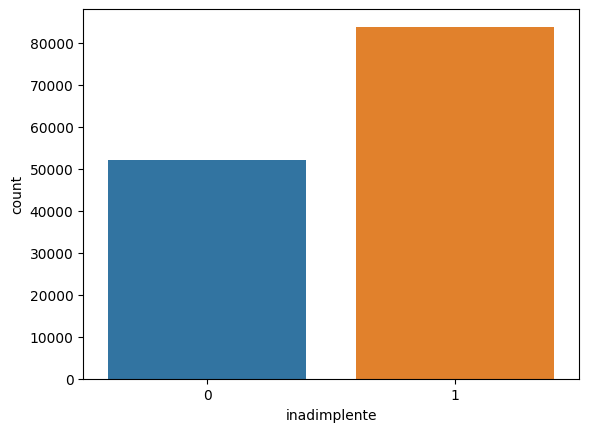

In [ ]:
ax = sns.countplot(x='inadimplente', data=df_modificado)

In [ ]:
#separar as variáveis caracteristica e respostas
X = df_modificado.drop('inadimplente', axis = 1)
y = df_modificado['inadimplente']

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [ ]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,vencido_acima_de_15_dias,ativo_problematico,tcb_Bancário,tcb_Cooperativas,tcb_Não bancário,cliente_PF,ocupacao_PF - Aposentado/pensionista,ocupacao_PF - Autônomo,ocupacao_PF - Empregado de empresa privada,ocupacao_PF - Empregado de entidades sem fins lucrativos,...,modalidade_PF - Cartão de crédito,modalidade_PF - Empréstimo com consignação em folha,modalidade_PF - Empréstimo sem consignação em folha,modalidade_PF - Habitacional,modalidade_PF - Outros créditos,modalidade_PF - Rural e agroindustrial,modalidade_PF - Veículos,origem_Com destinação específica,origem_Sem destinação específica,inadimplente
0,2813.38,0.00,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,328556.06,243547.54,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1


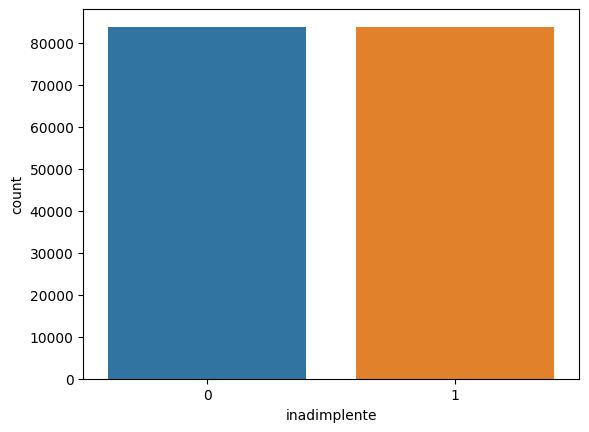

In [ ]:
ax = sns.countplot(x='inadimplente', data=dados_final)

#XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

In [ ]:
# Separando X e y
X_dados_final = dados_final.drop(['inadimplente'], axis=1)
y_dados_final = dados_final['inadimplente']

In [ ]:
X_dados_final_train, X_dados_final_test, y_dados_final_train, y_dados_final_test = train_test_split(X_dados_final, y_dados_final, random_state=42)

In [ ]:
X_dados_final_train.shape, X_dados_final_test.shape

((125809, 32), (41937, 32))

In [ ]:
len(X_dados_final_test) / len(X_dados_final)

0.25000298069700616

In [ ]:
#Criando o objeto com o classificador XGBoost
classificador_xgb = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score


resultado_cv = cross_val_score(classificador_xgb, X_dados_final_train, y_dados_final_train, cv = 10)

resultado_cv

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99992052, 1.        , 1.        , 1.        , 1.        ])

In [ ]:
#verificando a acurácia do modelo
acuracia_cv = resultado_cv.mean()

acuracia_cv

0.9999920515062396

In [ ]:
classificador_xgb_modificado = xgb.XGBClassifier(max_depth=2)
100*(cross_val_score(classificador_xgb_modificado, X_dados_final_train, y_dados_final_train).mean())

99.99920515062396

In [ ]:
classificador_xgb_dart =  xgb.XGBClassifier(booster='dart')

100 * cross_val_score(classificador_xgb_dart, X_dados_final_train, y_dados_final_train).mean()

99.99920515062396

In [ ]:
classificador_xgb_gblinear =  xgb.XGBClassifier(booster='gblinear')

100 * cross_val_score(classificador_xgb_gblinear, X_dados_final_train, y_dados_final_train).mean()

99.97456444088023

###Melhor Modelo

In [ ]:
#Melhor modelo
classificador_melhor_modelo= classificador_xgb_dart

In [ ]:
classificador_melhor_modelo.fit(X_dados_final_train, y_dados_final_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predicoes_dados_final = classificador_melhor_modelo.predict(X_dados_final_test)

In [ ]:
(predicoes_dados_final == y_dados_final_test).sum()

41936

In [ ]:
acertos = (predicoes_dados_final == y_dados_final_test).sum()
total_observacoes = len(y_dados_final_test)

acuracia = 100 * acertos / total_observacoes

acuracia

99.99761547082528

In [ ]:
dados_final.head(2)

,vencido_acima_de_15_dias,ativo_problematico,tcb_Bancário,tcb_Cooperativas,tcb_Não bancário,cliente_PF,ocupacao_PF - Aposentado/pensionista,ocupacao_PF - Autônomo,ocupacao_PF - Empregado de empresa privada,ocupacao_PF - Empregado de entidades sem fins lucrativos,...,modalidade_PF - Cartão de crédito,modalidade_PF - Empréstimo com consignação em folha,modalidade_PF - Empréstimo sem consignação em folha,modalidade_PF - Habitacional,modalidade_PF - Outros créditos,modalidade_PF - Rural e agroindustrial,modalidade_PF - Veículos,origem_Com destinação específica,origem_Sem destinação específica,inadimplente
0,2813.38,0.00,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,328556.06,243547.54,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
confusao_matrix = confusion_matrix(y_dados_final_test, predicoes_dados_final)
confusao_matrix

array([[21043,     0],
       [    1, 20893]])

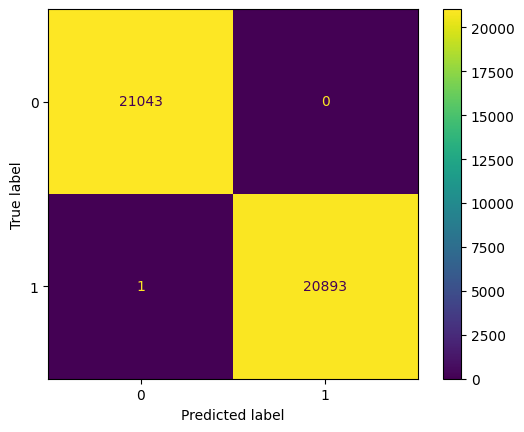

In [ ]:
dsp = ConfusionMatrixDisplay(confusion_matrix = confusao_matrix)
dsp.plot()
plt.show()

###Retirando dos dados a coluna Ativo problematico

In [ ]:
dados_final_modificado = dados_final.drop(['ativo_problematico'], axis= 1)
dados_final_modificado.head(2)

,vencido_acima_de_15_dias,tcb_Bancário,tcb_Cooperativas,tcb_Não bancário,cliente_PF,ocupacao_PF - Aposentado/pensionista,ocupacao_PF - Autônomo,ocupacao_PF - Empregado de empresa privada,ocupacao_PF - Empregado de entidades sem fins lucrativos,ocupacao_PF - Empresário,...,modalidade_PF - Cartão de crédito,modalidade_PF - Empréstimo com consignação em folha,modalidade_PF - Empréstimo sem consignação em folha,modalidade_PF - Habitacional,modalidade_PF - Outros créditos,modalidade_PF - Rural e agroindustrial,modalidade_PF - Veículos,origem_Com destinação específica,origem_Sem destinação específica,inadimplente
0,2813.38,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,328556.06,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [ ]:
#separar as variáveis caracteristica e respostas
X = dados_final_modificado.drop('inadimplente', axis = 1)
y = dados_final_modificado['inadimplente']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
resultado_cv = cross_val_score(classificador_xgb, X_train, y_train)

resultado_cv

array([0.92623798, 0.92929815, 0.92949686, 0.92683411, 0.92770558])

In [ ]:
acuracia_cv = resultado_cv.mean()

acuracia_cv

0.9279145354548612

In [ ]:
classificador_xgb_dart =  xgb.XGBClassifier(booster='dart')

classificador_xgb_dart.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predicao = classificador_xgb_dart.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
#metricas no teste
print("Acurácia do modelo é :",accuracy_score(y_test, predicao))
print("Precisão do modelo é :", precision_score(y_test,predicao))
print("Recall do modelo é :", recall_score(y_test, predicao))

Acurácia do modelo é : 0.9282972077163364
Precisão do modelo é : 0.9329944323408376
Recall do modelo é : 0.9223221977601225


In [ ]:
conf_matrix = confusion_matrix(y_test, predicao)
conf_matrix

array([[19659,  1384],
       [ 1623, 19271]])

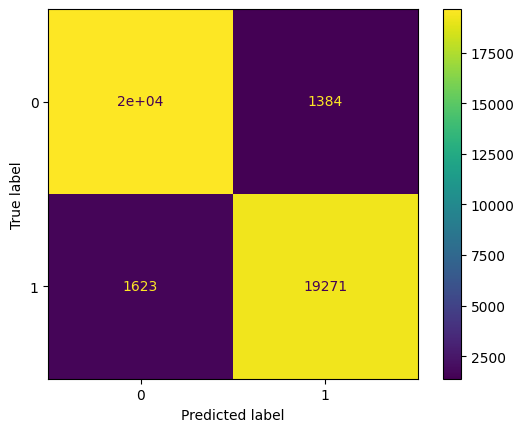

In [ ]:
dsp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
dsp.plot()
plt.grid(False)
plt.show()

#Fazer a classificação